In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

## Loading King County, Washington, Real Estate Data Set

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

**Cursory Examination of data set**

In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
df['price'][21596]

325000.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:>

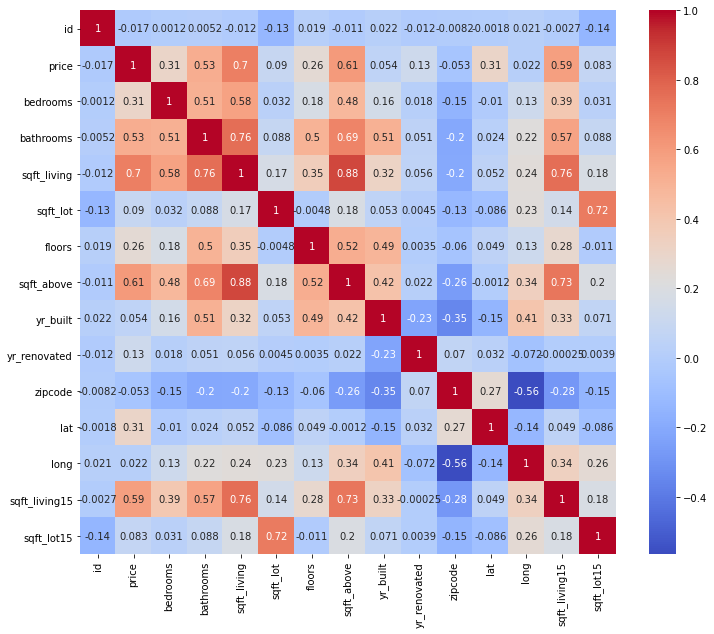

In [7]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [8]:
df_corr = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corr

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

**Observations:**  
Looks like 'price' is the only dependant variable.
'sqft_living' is the most closely correlated variable to 'price'.
'sqft_above' and 'sqft_living15' also have correlation but they may be closely correlated to each other.
'bathrooms' also seems to have correlation to 'price'.
Curiously, 'bedrooms' is not correlated to 'price'.

In [9]:
y = df['price']
X = df['sqft_living']

sqft_living_model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
sqft_living_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        15:40:49   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
len(df)

21597

In [42]:
df[['price', 'sqft_living']].describe()

,price,sqft_living
count,2.159700e+04,21597.000000
mean,5.402966e+05,2080.321850
std,3.673681e+05,918.106125
min,7.800000e+04,370.000000
25%,3.220000e+05,1430.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


In [35]:
n=len(df)
s_mean= df['sqft_living'].mean()
std = df['sqft_living'].std()

t_value = stats.t.ppf(.975, df=n-1)
std_err = std/np.sqrt(n)
margin_error = t_value * std_err
int_min = s_mean - margin_error
int_max = s_mean + margin_error

print(t_value, std, std_err)

1.9600738383060852 918.1061250800805 6.2473547929536615


In [10]:
y = df['price']
X = df['sqft_above']

sqft_above_model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
sqft_above_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        15:40:49   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y = df['price']
X = df['bedrooms']

bedrooms_model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
bedrooms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        15:40:49   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x = df[['sqft_living','sqft_above', 'bedrooms', 'bathrooms']]
y = df['price']

house_features_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     5570.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        15:40:49   Log-Likelihood:            -2.9974e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21592   BIC:                         5.995e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.143e+04   6997.070     11.638      0.000    6.77e+04    9.51e+04
sqft_living   331.5011      4.611     71.893      0.000     322.463     340.539
sqft_above    -27.6466      4.429     -6.243      0.000     -36.327     -18.966
bedrooms    -5.978e+04   2353.492    -25.400      0.000   -6.44e+04   -5.52e+04
bathrooms    9606.7903   3534.007      2.718      0.007    2679.875    1.65e+04
==============================================================================
Omnibus:                    14369.414   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488204.760
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      25.647   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
x = df['sqft_living']
y = df['sqft_above']

house_features_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_above   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 7.155e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        15:56:04   Log-Likelihood:            -1.5996e+05
No. Observations:               21597   AIC:                         3.199e+05
Df Residuals:                   21595   BIC:                         3.199e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         144.7249      6.717     21.545      0.000     131.558     157.891
sqft_living     0.7902      0.003    267.491      0.000       0.784       0.796
==============================================================================
Omnibus:                     1364.510   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1634.472
Skew:                          -0.661   Prob(JB):                         0.00
Kurtosis:                       3.260   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

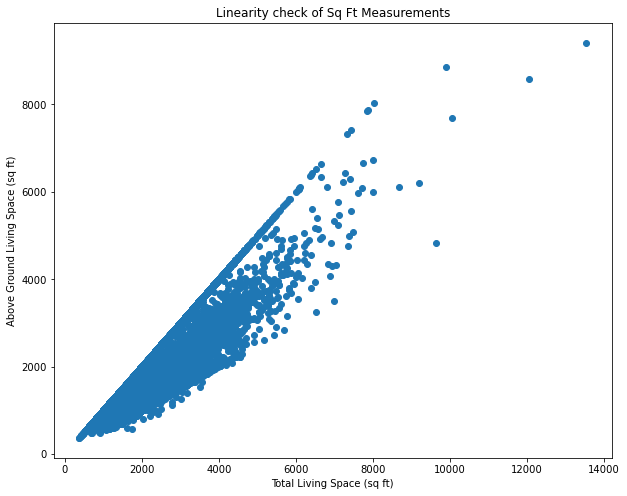

In [47]:
plt.figure(figsize=(10,8))
plt.xlabel("Total Living Space (sq ft)")
plt.ylabel("Above Ground Living Space (sq ft)")
plt.scatter(df['sqft_living'], df['sqft_above'])
plt.title("Linearity check of Sq Ft Measurements")
plt.show()

In [32]:
x = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']

house_features_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        15:57:23   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x = df[['bedrooms', 'bathrooms']]
y = df['price']

house_features_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4169.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:30:55   Log-Likelihood:            -3.0387e+05
No. Observations:               21597   AIC:                         6.077e+05
Df Residuals:                   21594   BIC:                         6.078e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.378e+04   8308.256     -4.065      0.000   -5.01e+04   -1.75e+04
bedrooms    2.061e+04   2673.354      7.708      0.000    1.54e+04    2.58e+04
bathrooms   2.385e+05   3220.254     74.053      0.000    2.32e+05    2.45e+05
==============================================================================
Omnibus:                    17331.190   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           903313.817
Skew:                           3.471   Prob(JB):                         0.00
Kurtosis:                      33.913   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']

house_features_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:34:45   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
x = df['zipcode']
y = df['price']

zipcode_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
zipcode_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Tue, 10 May 2022   Prob (F-statistic):           4.06e-15
Time:                        05:10:19   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.65e+07   4.58e+06      7.977      0.000    2.75e+07    4.55e+07
zipcode     -366.6086     46.649     -7.859      0.000    -458.045    -275.173
==============================================================================
Omnibus:                    19044.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123391.740
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      37.413   Cond. No.                     1.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
x = df['lat']
y = df['price']

lat_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
lat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2242.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        05:10:19   Log-Likelihood:            -3.0632e+05
No. Observations:               21597   AIC:                         6.127e+05
Df Residuals:                   21595   BIC:                         6.127e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.814e+07   8.17e+05    -46.689      0.000   -3.97e+07   -3.65e+07
lat         8.132e+05   1.72e+04     47.351      0.000     7.8e+05    8.47e+05
==============================================================================
Omnibus:                    20309.325   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1511477.644
Skew:                           4.367   Prob(JB):                         0.00
Kurtosis:                      43.042   Cond. No.                     1.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
x = df['long']
y = df['price']

long_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
long_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.49
Date:                Tue, 10 May 2022   Prob (F-statistic):            0.00120
Time:                        05:10:19   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.571e+06   2.17e+06      3.488      0.000    3.32e+06    1.18e+07
long        5.753e+04   1.78e+04      3.239      0.001    2.27e+04    9.23e+04
==============================================================================
Omnibus:                    19133.231   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1137712.625
Skew:                           4.032   Prob(JB):                         0.00
Kurtosis:                      37.630   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
x = df[['sqft_living','sqft_above', 'bedrooms', 'bathrooms']]
y = df['price']

house_features_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     5570.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        05:10:19   Log-Likelihood:            -2.9974e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21592   BIC:                         5.995e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.143e+04   6997.070     11.638      0.000    6.77e+04    9.51e+04
sqft_living   331.5011      4.611     71.893      0.000     322.463     340.539
sqft_above    -27.6466      4.429     -6.243      0.000     -36.327     -18.966
bedrooms    -5.978e+04   2353.492    -25.400      0.000   -6.44e+04   -5.52e+04
bathrooms    9606.7903   3534.007      2.718      0.007    2679.875    1.65e+04
==============================================================================
Omnibus:                    14369.414   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488204.760
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      25.647   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
x = df[['sqft_living','long']]
y = df['price']

house_size_long_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_size_long_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        05:10:19   Log-Likelihood:            -2.9956e+05
No. Observations:               21597   AIC:                         5.991e+05
Df Residuals:                   21594   BIC:                         5.992e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.997e+07   1.56e+06    -32.074      0.000    -5.3e+07   -4.69e+07
sqft_living   295.9561      1.953    151.572      0.000     292.129     299.783
long        -4.082e+05   1.27e+04    -32.045      0.000   -4.33e+05   -3.83e+05
==============================================================================
Omnibus:                    14148.549   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           506973.258
Skew:                           2.639   Prob(JB):                         0.00
Kurtosis:                      26.141   Cond. No.                     2.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x = df[['sqft_living','zipcode']]
y = df['price']

house_size_zipcode_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_size_zipcode_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.082e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        05:10:19   Log-Likelihood:            -2.9989e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21594   BIC:                         5.998e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.096e+07   3.31e+06    -18.442      0.000   -6.74e+07   -5.45e+07
sqft_living   288.0945      1.964    146.689      0.000     284.245     291.944
zipcode       620.9595     33.695     18.429      0.000     554.914     687.005
==============================================================================
Omnibus:                    14831.494   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           550498.390
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      27.080   Cond. No.                     1.84e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# df.drop(columns = 'price_sqft', inplace = True)

In [35]:
# df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1


In [36]:
df['price_sqft_living'] = df['price'] / df['sqft_living']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_num,price_sqft_living
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,303.571429


In [37]:
df['price_sqft_lot'] = df['price'] / df['sqft_lot']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_num,price_sqft_living,price_sqft_lot
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,1,188.050847,39.274336
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,209.338521,74.288870
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,47.7379,-122.233,2720,8062,1,233.766234,18.000000
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,308.163265,120.800000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1,303.571429,63.118812


In [38]:
x = df[['price_sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']

house_features_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 1.459e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:44:43   Log-Likelihood:            -2.9543e+05
No. Observations:               21597   AIC:                         5.909e+05
Df Residuals:                   21593   BIC:                         5.909e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.693e+05   7265.082   -105.885      0.000   -7.84e+05   -7.55e+05
price_sqft_living  2134.5177     13.352    159.861      0.000    2108.346    2160.689
bedrooms           7.558e+04   1841.594     41.038      0.000     7.2e+04    7.92e+04
bathrooms           2.32e+05   2179.704    106.423      0.000    2.28e+05    2.36e+05
==============================================================================
Omnibus:                    18399.214   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2407894.978
Skew:                           3.487   Prob(JB):                         0.00
Kurtosis:                      54.256   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
x = df[['price_sqft_lot', 'bedrooms', 'bathrooms']]
y = df['price']

house_features_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     3490.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        09:45:02   Log-Likelihood:            -3.0312e+05
No. Observations:               21597   AIC:                         6.063e+05
Df Residuals:                   21593   BIC:                         6.063e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.088e+05   8252.097    -13.183      0.000   -1.25e+05   -9.26e+04
price_sqft_lot   891.4664     22.729     39.222      0.000     846.917     936.016
bedrooms        4.118e+04   2635.708     15.624      0.000     3.6e+04    4.63e+04
bathrooms       2.036e+05   3235.712     62.932      0.000    1.97e+05     2.1e+05
==============================================================================
Omnibus:                    17719.797   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1083553.148
Skew:                           3.538   Prob(JB):                         0.00
Kurtosis:                      36.971   Cond. No.                         535.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df_waterfront = df.loc[df['waterfront'] == 'YES']
df_waterfront.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,YES,AVERAGE,...,9 Better,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,YES,EXCELLENT,...,7 Average,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,YES,EXCELLENT,...,9 Better,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,YES,EXCELLENT,...,5 Fair,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,YES,EXCELLENT,...,10 Very Good,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508


In [19]:
x = df_waterfront['sqft_living']
y = df_waterfront['price']

house_waterfront_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_waterfront_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     522.2
Date:                Tue, 10 May 2022   Prob (F-statistic):           9.43e-50
Time:                        05:10:19   Log-Likelihood:                -2131.7
No. Observations:                 146   AIC:                             4267.
Df Residuals:                     144   BIC:                             4273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.744e+05   9.77e+04     -2.808      0.006   -4.68e+05   -8.12e+04
sqft_living   613.7987     26.859     22.853      0.000     560.710     666.888
==============================================================================
Omnibus:                        2.185   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.216
Skew:                          -0.287   Prob(JB):                        0.330
Kurtosis:                       2.814   Cond. No.                     8.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

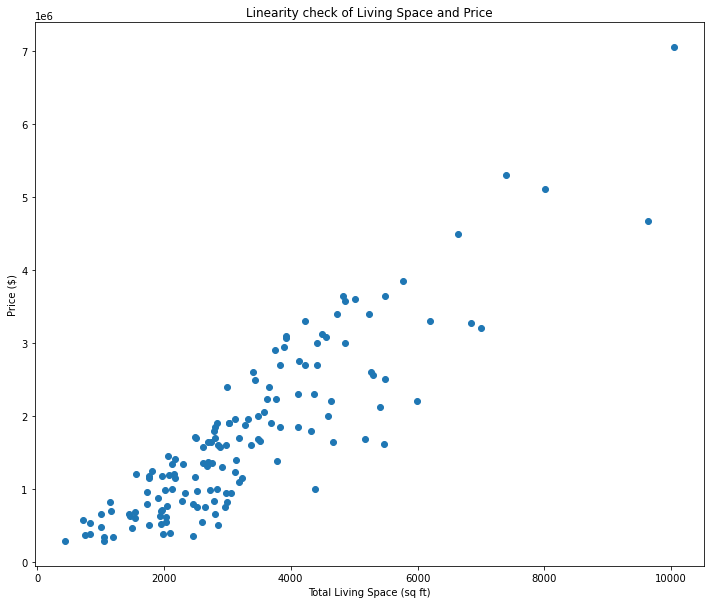

In [48]:
plt.figure(figsize=(12,10))
plt.xlabel("Total Living Space (sq ft)")
plt.ylabel("Price ($)")
plt.scatter(df_waterfront['sqft_living'], df_waterfront['price'])
plt.title("Linearity check of Living Space and Price")
plt.show()

In [21]:
df_view = df.loc[df['waterfront'] == 'YES']

In [22]:
view_map = {'EXCELLENT':5, 'GOOD':4, 'AVERAGE':3, 'FAIR':2, 'NONE':1, np.nan:0}
df['view_num'] = df['view'].map(view_map)

In [23]:
# df['view_num'] = df['view_num'].replace(np.nan, 0)

In [24]:
df.head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,1
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,1
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,1


In [25]:
x = df['price']
y = df['view_num']

house_view_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_view_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               view_num   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3903.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        05:10:20   Log-Likelihood:                -23134.
No. Observations:               21597   AIC:                         4.627e+04
Df Residuals:                   21595   BIC:                         4.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7887      0.009     92.267      0.000       0.772       0.805
price       8.173e-07   1.31e-08     62.470      0.000    7.92e-07    8.43e-07
==============================================================================
Omnibus:                    12358.979   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103275.310
Skew:                           2.696   Prob(JB):                         0.00
Kurtosis:                      12.257   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
x = df['view_num']
y = df['price']

house_view_model = sm.OLS(endog=y, exog = sm.add_constant(x)).fit()
house_view_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3903.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        05:10:20   Log-Likelihood:            -3.0560e+05
No. Observations:               21597   AIC:                         6.112e+05
Df Residuals:                   21595   BIC:                         6.112e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.099e+05   4346.770     71.295      0.000    3.01e+05    3.18e+05
view_num    1.873e+05   2997.762     62.470      0.000    1.81e+05    1.93e+05
==============================================================================
Omnibus:                    18144.450   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1093428.473
Skew:                           3.685   Prob(JB):                         0.00
Kurtosis:                      37.070   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

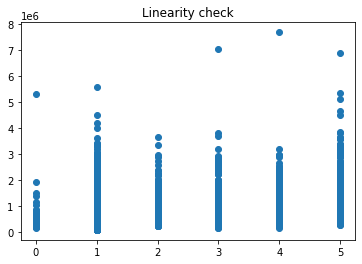

In [27]:
plt.scatter(df['view_num'], df['price'])
plt.title("Linearity check")
plt.show()